# Electro Pi Scholarship
## Week 2: Supervised Learning (Classics)
**Requirements**: Building a large notebook to deal with the problem and compare between all models you have learnt so far after tuning them  with your favorite hyper tuning parameters technique.  


### Problem 1: Predict whether Customer would likely to Churn or not in Telecom Company.

**Context**  
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

**Content**  
The Orange Telecom's Churn Dataset, which consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription, will be used to develop predictive models. Two datasets are made available here: The churn-80 and churn-20 datasets can be downloaded.

The two sets are from the same batch, but have been split by an 80/20 ratio. As more data is often desirable for developing ML models, let's use the larger set (that is, churn-80) for training and cross-validation purposes, and the smaller set (that is, churn-20) for final testing and model performance evaluation.

**Inspiration**  
To explore this type of models and learn more about the subject.

**Dataset**  
The two datasets available [here](https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets). Each row represents a customer; each column contains customer's attributes.  
The datasets have the following attributes or features (Note: The `Churn` column is the target to predict):  
1. `State`: string. 
2. `Account length`: integer. 
3. `Area code`: integer. 
4. `International plan`: string. 
5. `Voice mail plan`: string. 
6. `Number vmail messages`: integer. 
7. `Total day minutes`: double. 
8. `Total day calls`: integer. 
9. `Total day charge`: double. 
10. `Total eve minutes`: double. 
11. `Total eve calls`: integer. 
12. `Total eve charge`: double. 
13. `Total night minutes`: double. 
14. `Total night calls`: integer. 
15. `Total night charge`: double. 
16. `Total intl minutes`: double. 
17. `Total intl calls`: integer. 
18. `Total intl charge`: double. 
19. `Customer service calls`: integer. 
20. `Churn`: string. 

# 01 Importing Modules

We will first download `catboost`, and `scikit-optimize` packages.

In [1]:
# '--upgrade --quiet --exists-action i' is for remove warning messages which take a lot of spcace
! pip install catboost --upgrade --quiet --exists-action i
! pip install scikit-optimize --upgrade --quiet --exists-action i

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
redshift-connector 2.0.900 requires pytz<2021.9,>=2020.1, but you have pytz 2022.1 which is incompatible.
pythonwhat 2.23.1 requires dill~=0.2.7.1, but you have dill 0.3.3 which is incompatible.
pythonwhat 2.23.1 requires jinja2~=2.10, but you have jinja2 3.0.1 which is incompatible.
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/pyt

In [2]:
# load modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle

# Hyper-parameters related packages
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Scoring package 
from sklearn.metrics import confusion_matrix

# Classical Classifiers
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Ensamble Learning
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Show all columns' content
pd.set_option('display.max_colwidth', None)

# 02 Loading and Reviewing Datasets 

We will start with the training dataset `churn-bigml-80.csv` and take general look on it.

In [3]:
# load churn-bigml-80.csv to df_80
df_80 = pd.read_csv('Telecom Churn Dataset/churn-bigml-80.csv')

# see first rows, information, describtion of both numerical and non-numerical columns
display(df_80.head())
display(df_80.info())
display(df_80.describe())
display(df_80.describe(exclude='number'))

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

None

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


,State,International plan,Voice mail plan,Churn
count,2666,2666,2666,2666
unique,51,2,2,2
top,WV,No,No,False
freq,88,2396,1933,2278


**We can notice that:**
1. No missing values.
2. As a general review: the numerical columns are in logic ranges (i.e. no negative values).
3. `International plan` and `Voice mail plan` columns contains only two values (`Yes`, `No`) so we will convert it to (`1`, `0`).
4. Most customers didn't churn (around 85%).

In [4]:
# first lets check if there is duplicated columns
df_80.duplicated().sum()

0

No duplication ....

In [5]:
# Convert `International plan` and `Voice mail plan` to numerical
df_80['International plan'] = df_80['International plan'].replace({'Yes': 1, 'No': 0})
df_80['Voice mail plan'] = df_80['Voice mail plan'].replace({'Yes': 1, 'No': 0})

Now we will load and look to the testing dataset `churn-bigml-20.csv`, also we have to apply the same what we did in the training dataset (Convert `International plan` and `Voice mail plan` to numerical) 

In [6]:
# load churn-bigml-20.csv to df_20
df_20 = pd.read_csv('Telecom Churn Dataset/churn-bigml-20.csv')

# see first rows, information, describtion of both numerical and non-numerical columns
display(df_20.head())
display(df_20.info())
display(df_20.describe())
display(df_20.describe(exclude='number'))

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

None

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


,State,International plan,Voice mail plan,Churn
count,667,667,667,667
unique,51,2,2,2
top,AZ,No,No,False
freq,19,614,478,572


In [7]:
# Convert `International plan` and `Voice mail plan` to numerical
df_20['International plan'] = df_20['International plan'].replace({'Yes': 1, 'No': 0})
df_20['Voice mail plan'] = df_20['Voice mail plan'].replace({'Yes': 1, 'No': 0})

# 03. Cleaning and EDA for Dataset

## 03.01 Checking (`minutes` - `charge`) columns Relationship 
From the fast reviewing in the dataset columns, I have noticed that we have 4 categories of charging depends on the call time or destination (`day`, `eve`, `night`, and `intl` - "international" ), each one of these categories has two columns (`minutes` and `charge`). it looks like these pair of columns are correlated, let us visualize it and decide based on the results. 

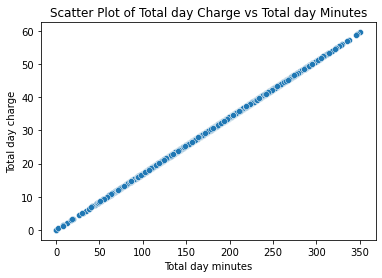

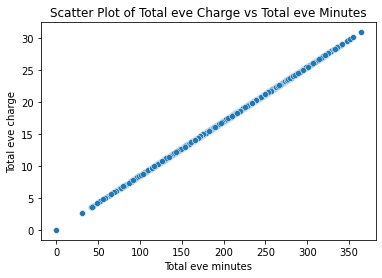

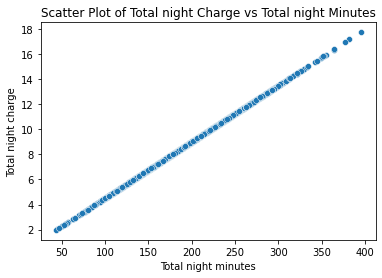

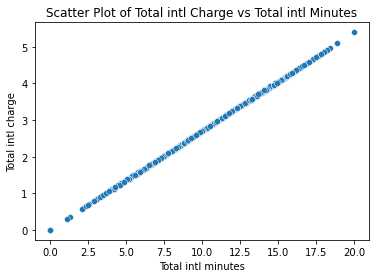

In [8]:
# scatter plotting each pair of columns
for type_call in ['day', 'eve', 'night', 'intl']:
    plt.figure()
    sns.scatterplot(data=df_80, x='Total {} minutes'.format(type_call), 
                    y='Total {} charge'.format(type_call)).set_title(
        'Scatter Plot of Total {} Charge vs Total {} Minutes'.format(type_call, type_call))

**As Expected**, columns are highly correlated, keeping it will cost more time for machine learning training and will not give more information, so we will drop all `charge` columns from both training and testing datasets. 

In [9]:
df_80.drop(['Total day charge', 'Total eve charge', 'Total night charge', 
            'Total intl charge'], axis=1, inplace=True)

In [10]:
df_20.drop(['Total day charge', 'Total eve charge', 'Total night charge', 
            'Total intl charge'], axis=1, inplace=True)

## 03.02 EDA for Training Dataset
Except of `State` column, all other columns are numerical, lets take information about the distribution of each column by plotting a histogram distribution of the column, and by plotting the histogram again with our target column (`Churn`) as legend.

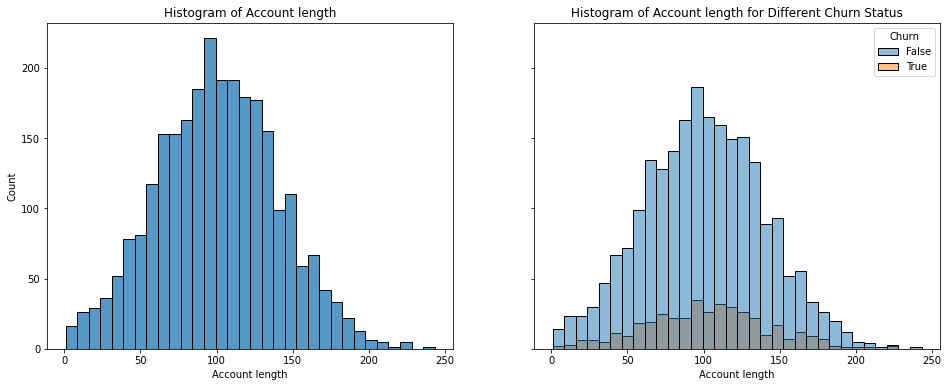

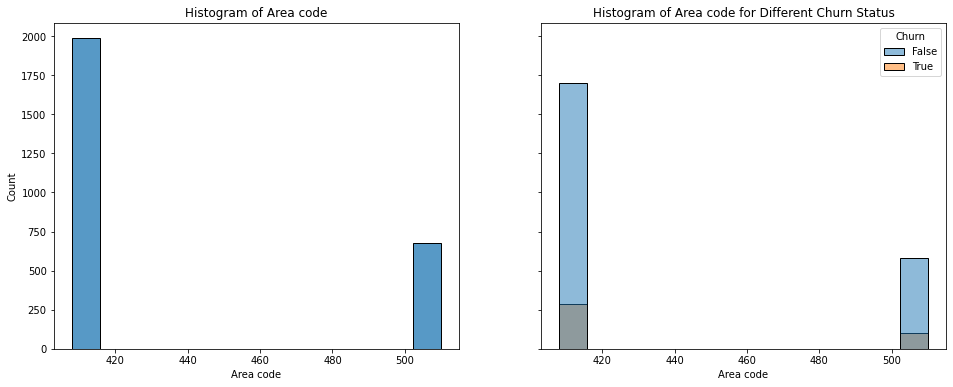

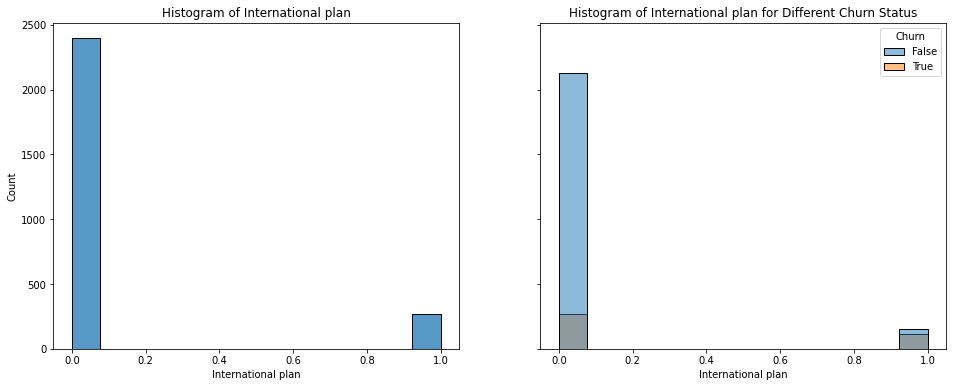

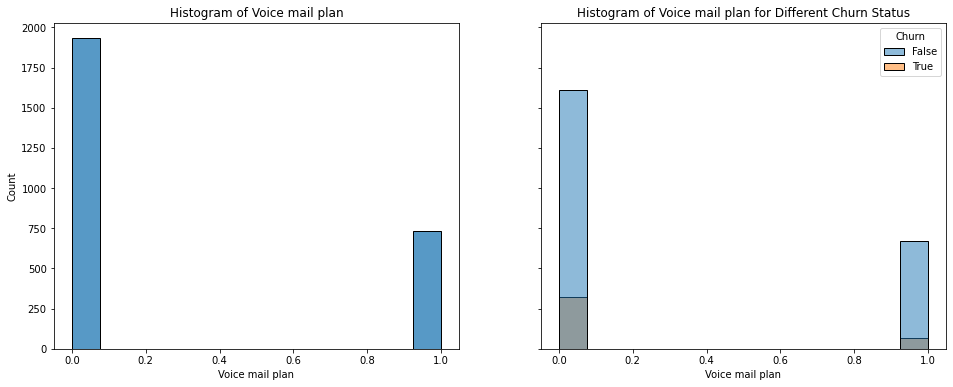

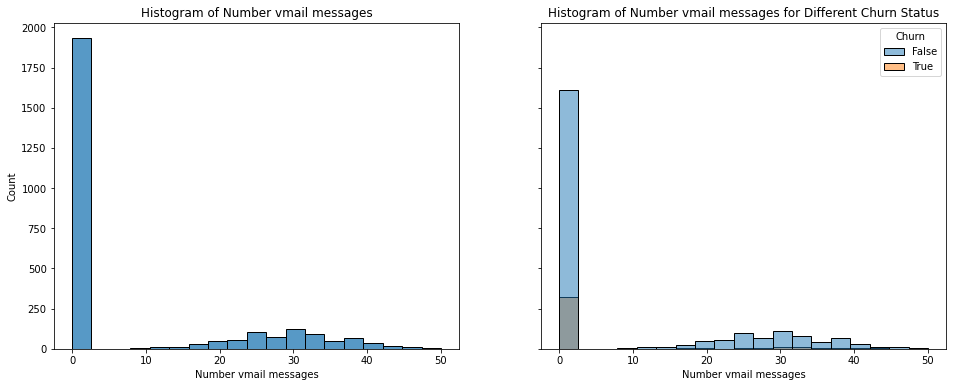

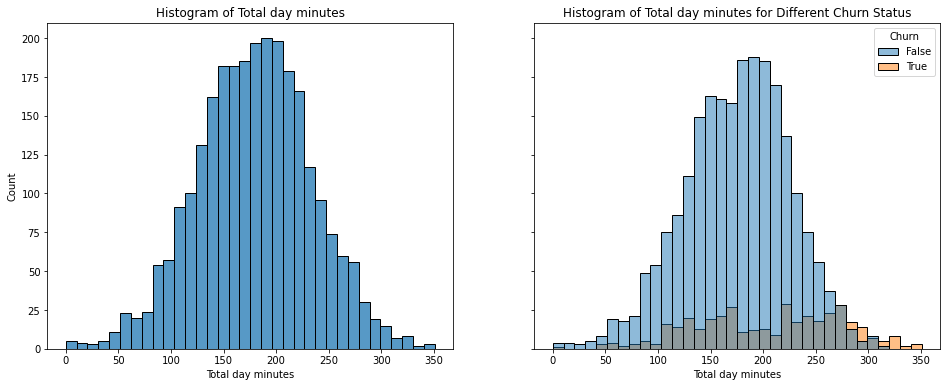

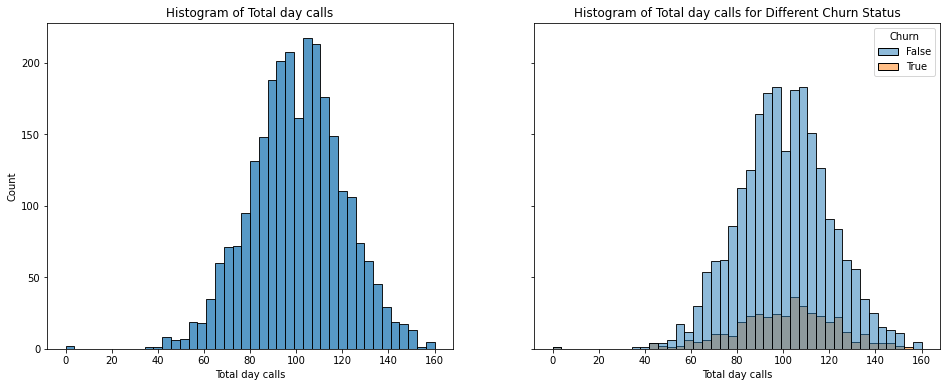

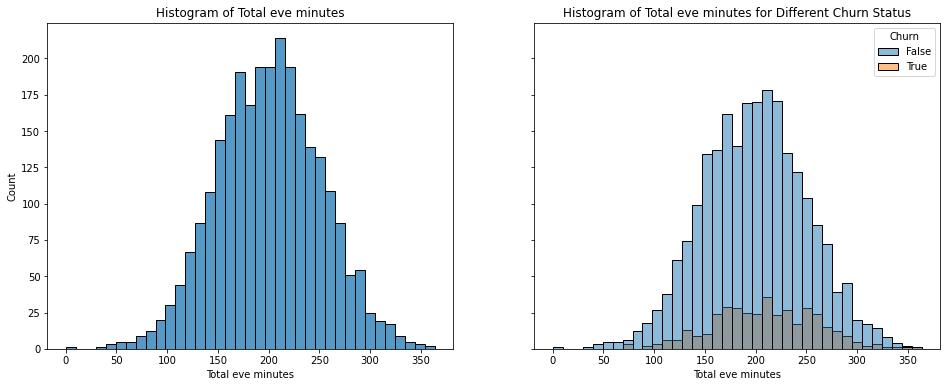

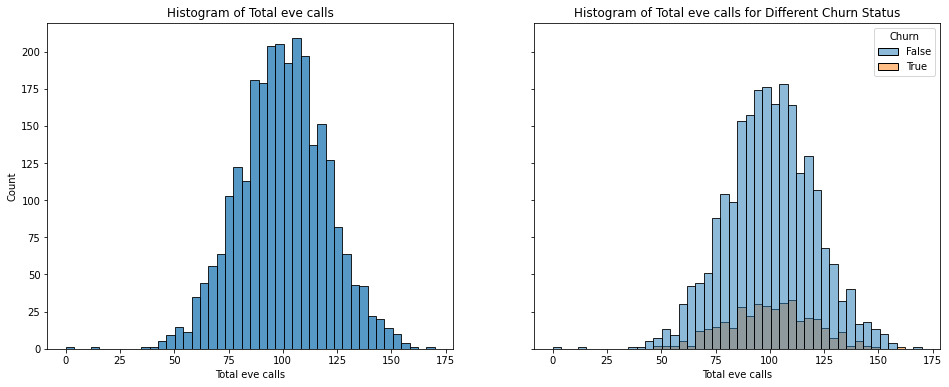

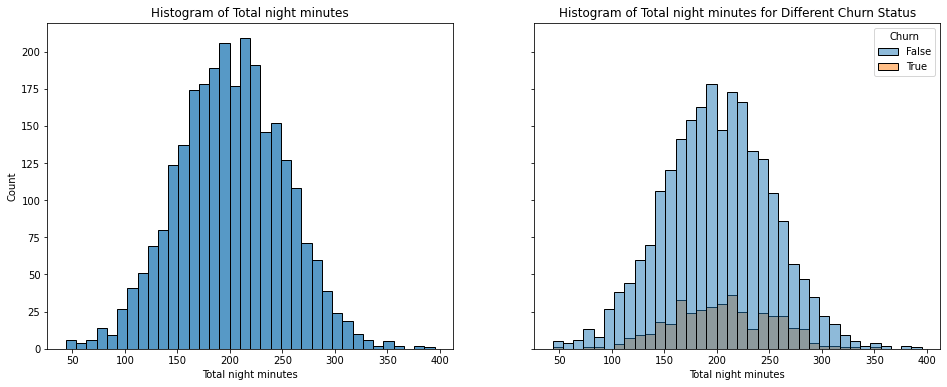

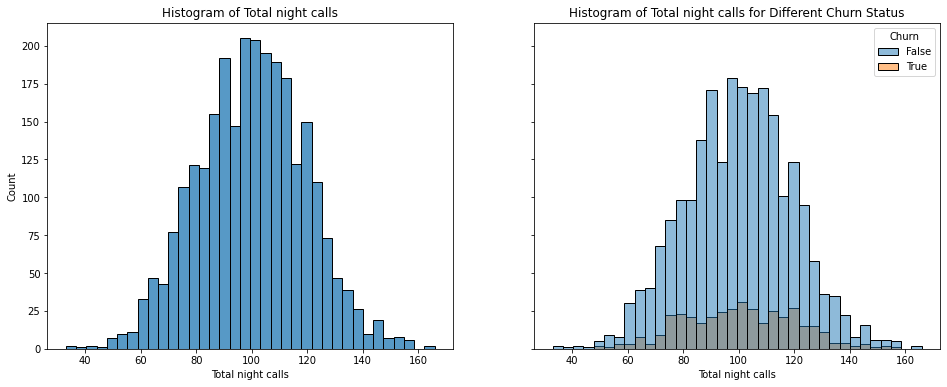

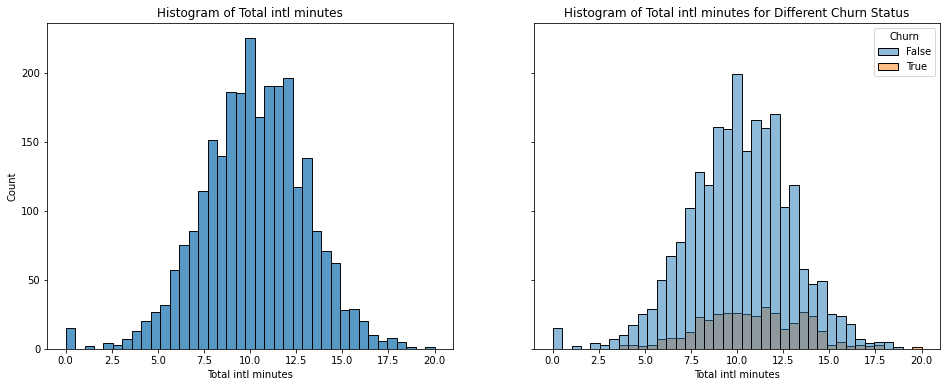

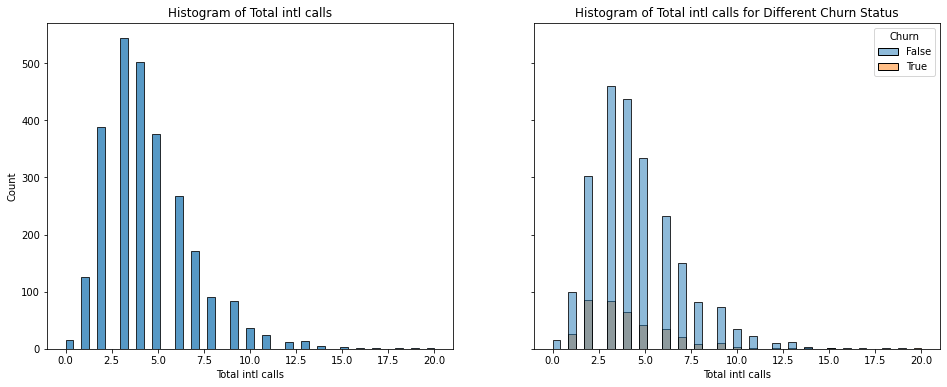

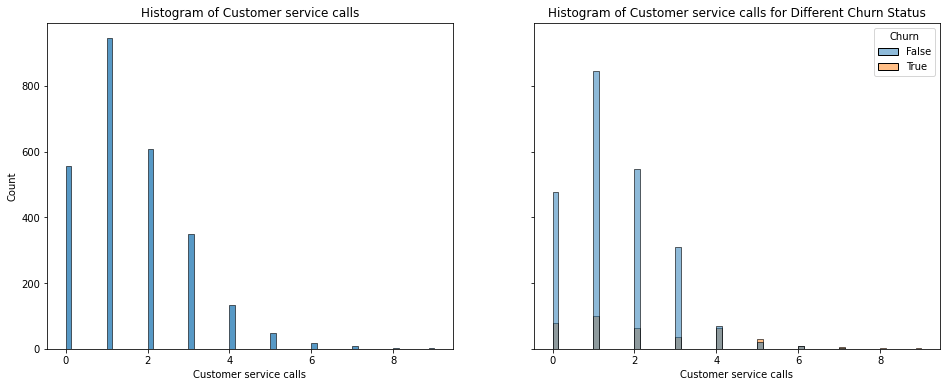

In [11]:
# loop over all columns except ('State' and 'Churn')
for col in df_80.columns[1: -1]:
    # make 2*1 plot
    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 6))
    # plot histogram in subplot 1
    sns.histplot(data = df_80, x=col, ax=axes[0]).set_title(
        'Histogram of '+ col)
    # plot histogram in subplot 2 with 'Churn' as legend
    sns.histplot(data = df_80, x=col, ax=axes[1], hue='Churn', alpha=0.5).set_title(
        'Histogram of '+ col + ' for Different Churn Status')

As a general look, the distributions are almost normal, also the percentage of Churn customers are almost the same for each feature, now lets plot a countplot for `State` column.

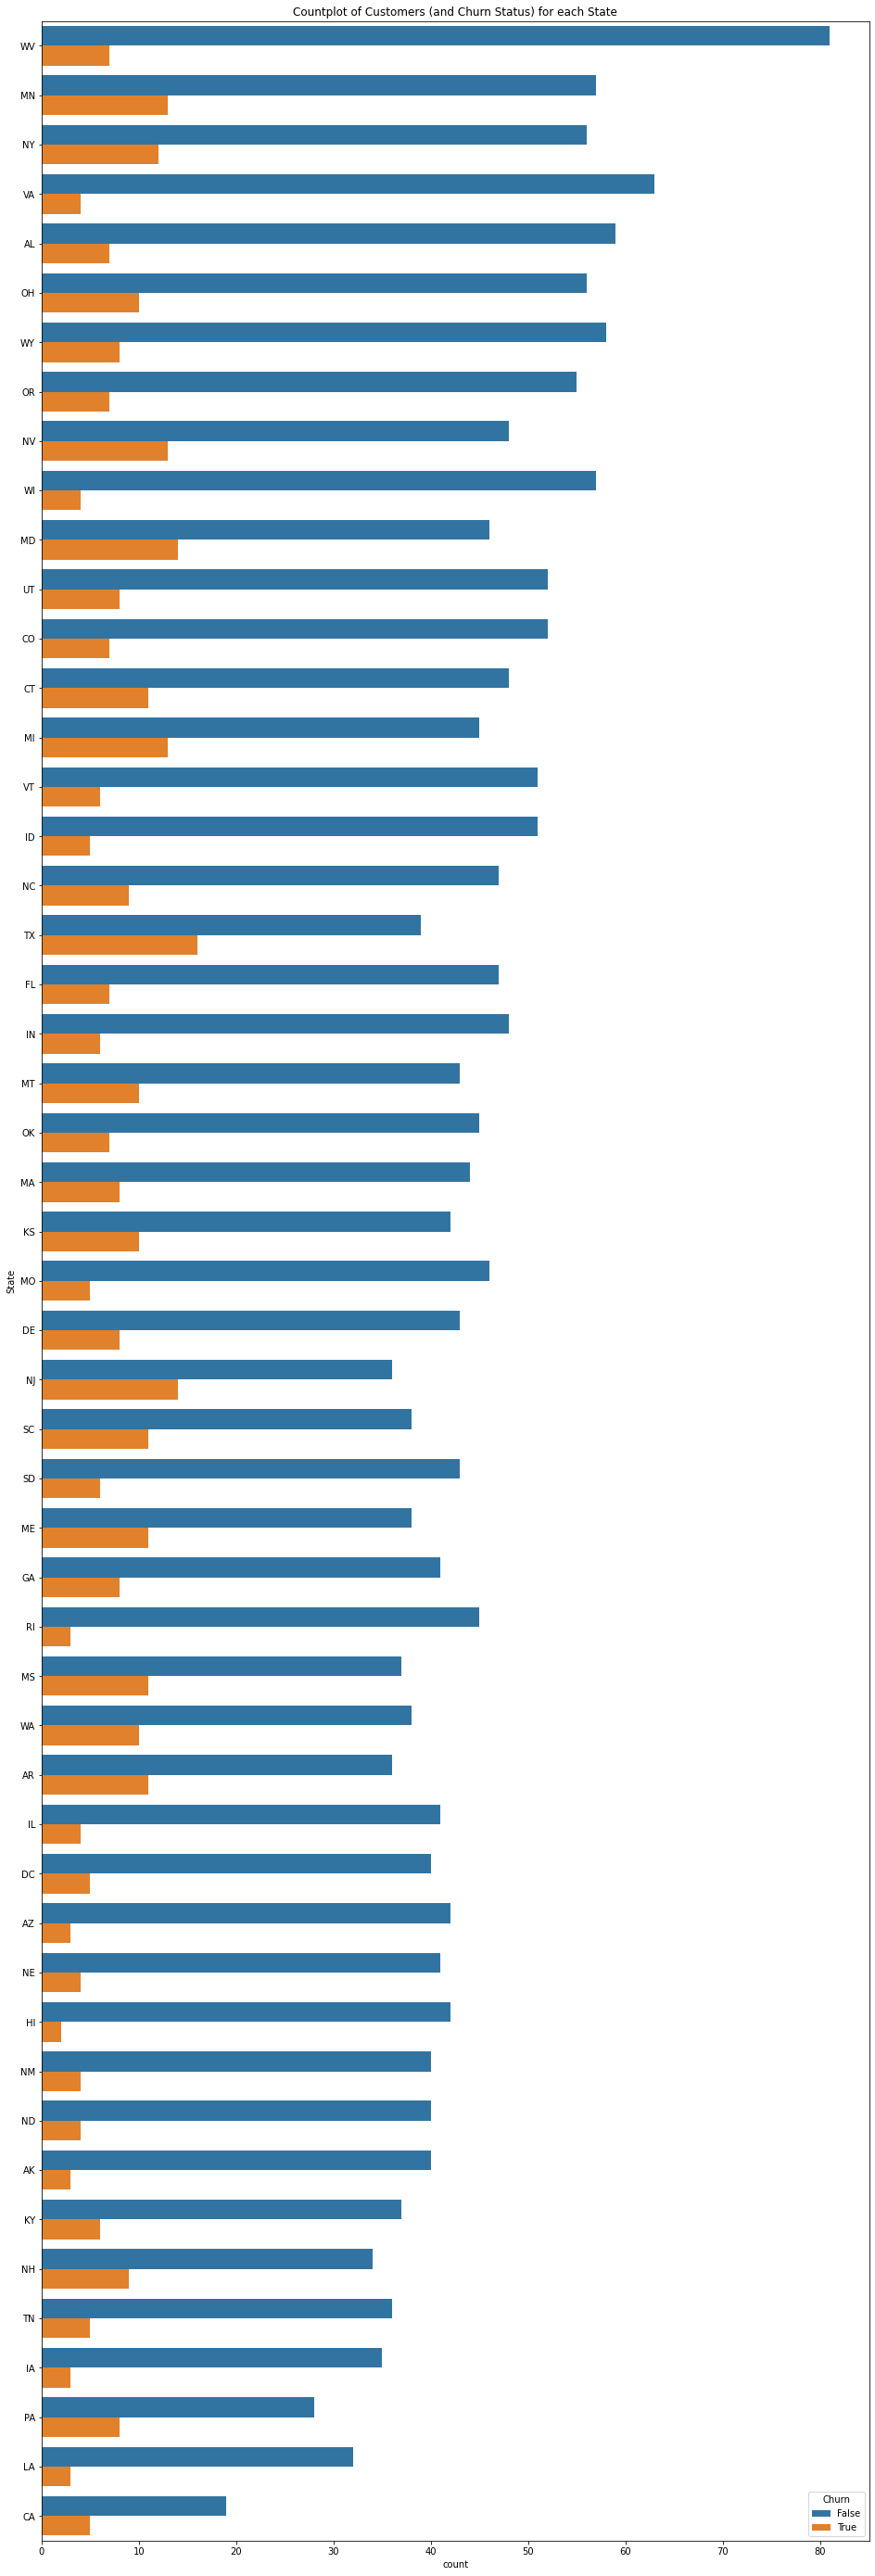

In [12]:
plt.figure(figsize=(16,50))
           
sns.countplot(data=df_80, y='State', hue='Churn', order=[*df_80['State'].value_counts().keys()],
              orient='h').set_title('Countplot of Customers (and Churn Status) for each State')
plt.show()

# 04 Machine Learning Initialization
We will:
1. Prepare both `X` and `y` arrays for both training and test datasets.  
2. Initialize `models` dictionary which contains all classifiers we will use with its chosen parameters that will be tuned using `BayesSearchCV`, the general structure of `models` will be:
   - `Name of Classifier` as **key**, the values will be another dictionary that has:
       - `estimator` as **key**, `Classifier Object` as **value**.
       - `search_spaces` as **key**, `Dictionary of parameters {parameter name: parameter values}` as **value**.   
       
         
> All Random Seeds / States will be set to `0`.

In [13]:
# Define Dataframes for all Features
X_80_df, X_20_df = df_80[df_80.columns[:-1]], df_20[df_20.columns[:-1]]

# Define X arrays after converting encode 'State' column using get_dummies method 
X_80 = pd.get_dummies(X_80_df, drop_first=True).values
X_20 = pd.get_dummies(X_20_df, drop_first=True).values

# Define our target vectors
y_80, y_20 = df_80[df_80.columns[-1]].values, df_20[df_20.columns[-1]].values

# Check shapes 
print(X_80.shape, X_20.shape)
print(y_80.shape, y_20.shape)

(2666, 64) (667, 64)
(2666,) (667,)


In [14]:
# Define models
models = {
    'Logistic Regression': {'estimator': LogisticRegression(random_state=0),
                            'search_spaces': {'C': Real(0.05, 10)}}, 
    
    'Ridge': {'estimator': RidgeClassifier(random_state=0), 
              'search_spaces': {'alpha': Real(0.05, 10)}}, 
    
    'Decision Tree': {'estimator': DecisionTreeClassifier(random_state=0), 
                      'search_spaces': {'criterion': Categorical(['gini', 'entropy', 'log_loss']),
                                        'max_depth': Integer(3, 10),
                                        'min_samples_split': Integer(2, 10)}},
    
    'K Neighbors': {'estimator': KNeighborsClassifier(),
                    'search_spaces': {'n_neighbors': Integer(3, 10),
                                      'weights': Categorical(['uniform', 'distance'])}},
    
    'Support Vector': {'estimator': SVC(random_state=0),
                       'search_spaces': {'C': Real(0.05, 10),
                                         'kernel': Categorical(['poly', 'rbf', 'sigmoid'])}},
    
    'Naive Bayes': {'estimator': GaussianNB(),
                    'search_spaces': {'var_smoothing': Real(1e-09, 1e-06)}},
    
    
    'Random Forest': {'estimator': RandomForestClassifier(random_state=0),
                      'search_spaces': {'criterion': Categorical(['gini', 'entropy', 'log_loss']), 
                                        'n_estimators': Integer(20, 500),
                                        'max_depth': Integer(3, 10), 
                                        'min_samples_split': Integer(2, 10)}},
    
    'Ada Boost': {'estimator': AdaBoostClassifier(random_state=0), 
                  'search_spaces': {'learning_rate': Real(0.05, 10),
                                    'n_estimators': Integer(20, 500)}},
    
    'Gradient Boosting': {'estimator': GradientBoostingClassifier(random_state=0),
                         'search_spaces': {'learning_rate': Real(0.05, 10),
                                           'n_estimators': Integer(20, 500)}},
    
    'Extreme Gradient Boosting': {'estimator': XGBClassifier(random_seed=0, verbosity=0),
                                  'search_spaces': {'eta': Real(0.05, 1),
                                                    'max_depth': Integer(3, 10)}},
    
    'Cat Boost': {'estimator': CatBoostClassifier(random_seed=0, logging_level='Silent'),
                  'search_spaces': {'learning_rate': Real(0.05, 1),
                                    'max_depth': Integer(3, 10),
                                    'n_estimators': Integer(20, 500)}} 
}

# 05 Searching for the Best Parameters for each Model
We will iterate over each `model` to:
1. Make `BayesSearchCV` for the best parameters for the `model` using `4` cross validations and `10` iterations.
2. The `BayesSearchCV` will be fitted on the training arrays (i.e. `X_80`, `y_80`).
3. Save the `model` with its best parameters in a new dictionary `best_models`. 

In [15]:
# initialize best_models
best_models = {}

# for each model:
for model in models.keys():
    # Initialize BayesSearchCV with cv=4 and n_iter=10
    bs = BayesSearchCV(estimator=models[model]['estimator'], search_spaces=models[model]['search_spaces'], 
                       cv=4, random_state=0, n_iter=10)

    # y_ture will be in string type for Cat Boost
    y_train = y_80 if model != 'Cat Boost' else y_80.astype('str')
    
    # fit model 
    bs.fit(X_80, y_train)
    # save model with best parameters in best_models
    best_models[model] = models[model]['estimator'].set_params(**bs.best_params_)
    
    print(model, '.... Finished')

Logistic Regression .... Finished
Ridge .... Finished
Decision Tree .... Finished
K Neighbors .... Finished
Support Vector .... Finished
Naive Bayes .... Finished
Random Forest .... Finished
Ada Boost .... Finished
Gradient Boosting .... Finished
Extreme Gradient Boosting .... Finished
Cat Boost .... Finished


# 06 Searching for the Best Model
Now we will fit each model in `best_models` to our training arrays and test it with our testing arrays, we will use the `confusion_matrix` as our accuracy matrix (we will save the values as dictionary to convert it to a good looking data frame later). 

In [16]:
# initialize models_accuracy
models_accuracy = {}

# For each model
for model in best_models.keys():
    # fit the model
    best_models[model].fit(X_80, y_80)
    # predict with test dataset
    y_pred = best_models[model].predict(X_20)
    # y_ture will be in string type for Cat Boost
    y_true = y_20 if model != 'Cat Boost' else y_20.astype('str')
    
    # find normalized overall confusion matrix and save it in dictionary
    # Note: after using flatten method the values will be a list [TN, FP, FN, TP]
    models_accuracy[model] = confusion_matrix(y_true, y_pred, normalize='all').flatten()

In [17]:
# convert values to dataframe
df_accuracy = pd.DataFrame.from_dict(models_accuracy, orient='index', 
                                     columns=['TN', 'FP', 'FN', 'TP'])
# Add 'Total True' and 'Total False' Columns
df_accuracy['Total True'] = df_accuracy['TN'] + df_accuracy['TP']
df_accuracy['Total False'] = df_accuracy['FN'] + df_accuracy['FP']

# sort values by Total True
df_accuracy = df_accuracy.sort_values('Total True', ascending=False)
df_accuracy

,TN,FP,FN,TP,Total True,Total False
Cat Boost,0.847076,0.010495,0.034483,0.107946,0.955022,0.044978
Extreme Gradient Boosting,0.844078,0.013493,0.034483,0.107946,0.952024,0.047976
Decision Tree,0.841079,0.016492,0.032984,0.109445,0.950525,0.049475
Gradient Boosting,0.827586,0.029985,0.044978,0.097451,0.925037,0.074963
Random Forest,0.857571,0.000000,0.083958,0.058471,0.916042,0.083958
K Neighbors,0.845577,0.011994,0.100450,0.041979,0.887556,0.112444
Ada Boost,0.817091,0.040480,0.082459,0.059970,0.877061,0.122939
Support Vector,0.857571,0.000000,0.142429,0.000000,0.857571,0.142429
Ridge,0.845577,0.011994,0.131934,0.010495,0.856072,0.143928
Logistic Regression,0.842579,0.014993,0.131934,0.010495,0.853073,0.146927


**The best model is the `Cat Boost` model with around `95.5%` accuracy, lets see its parameters**

In [18]:
best_models[df_accuracy.index[0]].get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'iterations': 370,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'class_names': ['False', 'True'],
 'random_seed': 0,
 'depth': 5,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'Logloss',
 'learning_rate': 0.2708883285522461,
 

In [19]:
# save the model to disk
filename = 'best_model.sav'
pickle.dump(best_models[df_accuracy.index[0]], open(filename, 'wb'))